# FINAL PREDICTION - CHAT GPT 

## Importing the libraries

In [1]:
import joblib as jb
encode_model=jb.load('files/train/model/train_encode_model.pkl')
model=jb.load('files/train/model/rf.pkl')

In [2]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

## Creating a def function

In [3]:
def flow (x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    #encoding
    encode_data=encode_model.transform(x_test)
    encode_data=pd.DataFrame(encode_data,columns=x_test.columns)
    y_test=y_test.replace({'good':0,'bad':1,'neutral':2})
    
    #predict
    y_pred=pd.DataFrame(model.predict(encode_data))
    
    #metrics
    report=classification_report(y_pred,y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return(y_pred,report,disp)

In [4]:
y_pred,report,disp=flow('test data/x.csv','test data/y.csv')

In [5]:
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
65784,1
65785,1
65786,1
65787,1


In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.00      1.00      0.00        37
           1       1.00      0.49      0.66     65714
           2       0.00      1.00      0.00        38

    accuracy                           0.49     65789
   macro avg       0.33      0.83      0.22     65789
weighted avg       1.00      0.49      0.66     65789



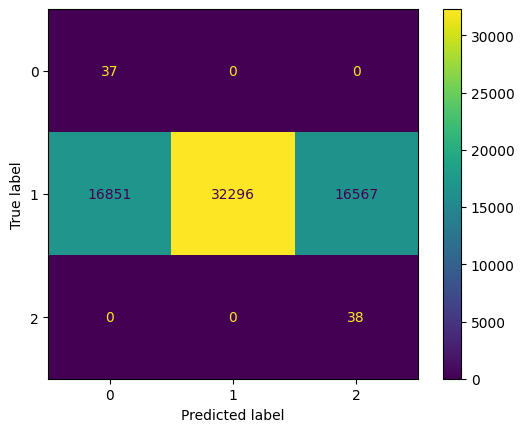

In [7]:
disp.plot()